<a href="https://colab.research.google.com/github/drhoffma/HarperIDEAShopCVCC/blob/main/assignments/00_assignment/PingPong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ping Pong Ball Color Changer

In [6]:
# download images
! wget https://github.com/drhoffma/HarperIDEAShopCVCC/raw/main/assignments/00_assignment/assets/jpg/keyboard.jpeg
! wget https://github.com/drhoffma/HarperIDEAShopCVCC/raw/main/assignments/00_assignment/assets/jpg/chair.jpeg
! wget https://github.com/drhoffma/HarperIDEAShopCVCC/raw/main/assignments/00_assignment/assets/jpg/table_blurry.jpeg
! wget https://github.com/drhoffma/HarperIDEAShopCVCC/raw/main/assignments/00_assignment/assets/jpg/oberwesal.jpeg

--2021-07-28 14:05:10--  https://github.com/drhoffma/HarperIDEAShopCVCC/raw/main/assignments/00_assignment/assets/jpg/keyboard.jpeg
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/drhoffma/HarperIDEAShopCVCC/main/assignments/00_assignment/assets/jpg/keyboard.jpeg [following]
--2021-07-28 14:05:11--  https://raw.githubusercontent.com/drhoffma/HarperIDEAShopCVCC/main/assignments/00_assignment/assets/jpg/keyboard.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110930 (108K) [image/jpeg]
Saving to: ‘keyboard.jpeg.1’

keyboard.jpeg.1     100%[===================>] 108.33K  --.-KB/s    in 0.01s  

In [28]:
# imports
import cv2
import numpy as np
from numpy import ones
import imutils
from google.colab.patches import cv2_imshow

# define your class, constructor, & methods

class PingPongBallColorChanger:
  def __init__(self, image):
    self.image = image

  def change_color(self, desired_color, color_hsv_min, color_hsv_max):

    # convert image to HSV
    hsv_img = cv2.cvtColor(self.image, cv2.COLOR_BGR2HSV)
    
    # mask out the orange using the HSV range
    thresh = cv2.inRange(hsv_img, color_hsv_min, color_hsv_max)
    #cv2_imshow(thresh)
    
    # create a blank image in the desired color
    shape = hsv_img.shape
    shape = list(shape)
    solid_colored_image = ones(shape) * desired_color

    #cv2_imshow(solid_colored_image)

    # turn all white pixels to the desired color
    desired_color_balls = cv2.bitwise_and(solid_colored_image, solid_colored_image, mask=thresh)
    cv2_imshow(desired_color_balls)

    # bitwise and the original image with the colored balls
    # DOES NOT WORK
    output = cv2.bitwise_and(self.image, self.image, mask=desired_color_balls)
    # cv2_imshow(output)

    # return the output
    return output

  def method1(self, param):
    pass



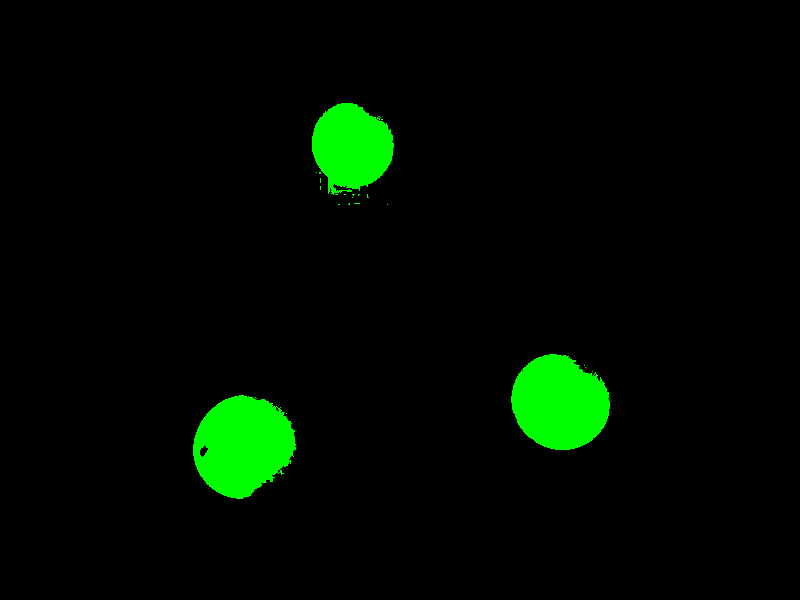

error: ignored

In [29]:
# test code

# load your image with cv2.imread()
image = cv2.imread("keyboard.jpeg")

# from the color range tool on David's machine
hsv_min=(7, 26, 243)
hsv_max=(36, 255, 255)

# instantiate your class and create an object
p = PingPongBallColorChanger(image)

# call relevant methods
desired_color = (0, 255, 0)
output = p.change_color(desired_color, hsv_min, hsv_max)
#cv2_imshow(output)